Copyright 2019 Lewis Matthews License: Creative Commons Attribution 4.0 International https://creativecommons.org/licenses/by/4.0/

This workflow was written to be accompanied by a bootcamp. 

www.wtdsi.org

www.crownquest.com

In [1]:
# Import toolboxes needed for workflow
import pandas as pd

from pandas import set_option
set_option('display.max_columns',400)

import numpy as np

import operator

import os
import re

import matplotlib.pyplot as plt
%matplotlib inline

from bokeh.io import push_notebook, show, output_notebook
from bokeh.models import ColumnDataSource, ColorBar
from bokeh.palettes import Spectral6
from bokeh.transform import linear_cmap
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

In [2]:
# Import vertical wells.

VertA = pd.read_excel('VertA_merge.xlsx')
VertB = pd.read_excel('VertB_merge.xlsx')
VertC = pd.read_excel('VertC_merge.xlsx')
VertD = pd.read_excel('VertD_merge.xlsx')
VertE = pd.read_excel('VertE_merge.xlsx')

In [3]:
# Take a look at VertA

VertA.describe()

DEPT         DT35         GMSG       NPOR:1          DEN  \
count  5649.000000  5649.000000  5649.000000  5649.000000  5649.000000   
mean   7078.225527    71.866779    89.908437    16.445192     2.525858   
std    1632.766580    10.991505    37.203267     7.939564     0.084223   
min    4251.000000    44.731456     8.345039     0.261295     1.768216   
25%    5663.000000    64.040047    66.718525    10.704965     2.489617   
50%    7079.000000    71.416223    90.266879    16.330837     2.535355   
75%    8492.000000    81.412552   112.341225    22.976069     2.574170   
max    9904.000000   109.634691   555.784152    39.996130     2.811949   

              PDPE         NOMD  ROP_-_FAST:1   BIT_WEIGHT  ROTARY_RPM  \
count  5649.000000  5649.000000   5649.000000  5649.000000      5649.0   
mean      3.354579  7078.225527     51.060011    23.792246         0.0   
std       0.647353  1632.766580     17.253549     4.288989         0.0   
min       2.063820  4251.000000     10.000000    -1.400000         0.0   
25%       2.909789  5663.000000     40.000000    22.900000         0.0   
50%       3.208577  7079.000000     52.000000    24.800000         0.0   
75%       3.690514  8492.000000     62.000000    25.600000         0.0   
max      12.646755  9904.000000    148.000000   149.800000         0.0   

       ROTARY_TORQUE  ANNULAR_VELOCITY  FLOW_DEVIATION  FLOW_IN_RATE  \
count         5649.0       5649.000000     5649.000000   5649.000000   
mean             0.0        139.083820       21.923703    544.694282   
std              0.0         19.618891        4.912804     76.866997   
min              0.0         49.000000        8.000000    192.000000   
25%              0.0        129.200000       18.000000    506.000000   
50%              0.0        134.200000       22.000000    526.000000   
75%              0.0        138.200000       26.000000    541.000000   
max              0.0        203.600000       32.000000    799.000000   

       FLOW_OUT_PERCENT  STRKS_-_PUMP_1  STRKS_-_PUMP_2  TOP_DRIVE_RPM  \
count       5649.000000     5649.000000     5649.000000    5649.000000   
mean          21.911843   345088.981590   234577.725084      57.490565   
std            4.917523   211657.645881    54513.987451       4.120197   
min            8.000000      155.000000   137641.000000       8.900000   
25%           18.000000   180632.000000   169584.000000      54.600000   
50%           22.000000   295757.000000   250320.000000      56.900000   
75%           26.000000   536094.000000   259037.000000      60.300000   
max           32.000000   781672.000000   338882.000000      69.500000   

       TOP_DRIVE_TORQUE  TORQUE_DIFF  WC_BIT_BOUNCE_  WC_BIT_WEIGHT  \
count       5649.000000  5649.000000     5649.000000    5649.000000   
mean       10724.530005   625.040025        0.649740      23.487077   
std         1280.502713   705.603376        0.230748       4.321974   
min         2511.000000     0.000000        0.500000      -1.900000   
25%        10088.000000   258.100000        0.520000      22.600000   
50%        10916.000000   373.900000        0.580000      24.500000   
75%        11602.000000   605.800000        0.680000      25.300000   
max        13560.000000  5960.600000        1.660000     148.100000   

       WC_DRILL_STOP_POINT  WC_DRUM_ENGAGED  WC_FEED_FORWARD  WC_FREQ_CMD  \
count          5649.000000      5649.000000           5649.0  5649.000000   
mean              3.276337         0.996999             60.0    15.944068   
std               0.180323         0.041615              0.0     6.207070   
min               3.000000         0.060000             60.0     2.190000   
25%               3.200000         1.000000             60.0    11.640000   
50%               3.300000         1.000000             60.0    15.900000   
75%               3.400000         1.000000             60.0    19.630000   
max               3.500000         1.000000             60.0    51.560000   

       WC_LOOP_IN_CONTROL_  WC

In [4]:
# Take a look at VertB

VertB.describe()

DEPT         DT35         GMGC       NPRL:1          DEN  \
count   4919.000000  4919.000000  4919.000000  4919.000000  4919.000000   
mean    7107.966863    70.413061    86.222905    14.946949     2.552449   
std     1657.812838    11.392140    42.526465     8.130921     0.094738   
min     4400.000000    45.867359     8.484020     0.303198     1.664607   
25%     5672.500000    62.127906    59.841883     9.046999     2.516786   
50%     7035.000000    69.651073    86.209660    14.537221     2.564923   
75%     8690.500000    80.048984   111.345240    21.804292     2.608634   
max    10023.000000   122.037341   563.306424    50.003808     2.793612   

              PDPE          NOMD  ROP_-_FAST:1   BIT_WEIGHT   ROTARY_RPM  \
count  4919.000000   4919.000000   4919.000000  4919.000000  4919.000000   
mean      3.775980   7107.966863     89.998374    18.938483    61.505733   
std       0.678059   1657.812838    240.790338     8.777581    10.706697   
min       2.199115   4400.000000      0.000000   -36.500000     0.000000   
25%       3.302934   5672.500000     56.000000    16.200000    61.400000   
50%       3.628081   7035.000000     69.000000    21.700000    63.700000   
75%       4.235057   8690.500000     83.000000    23.700000    65.400000   
max      10.072201  10023.000000   3929.000000   190.700000    75.100000   

       ROTARY_TORQUE  ANNULAR_VELOCITY  FLOW_DEVIATION  FLOW_IN_RATE  \
count         4919.0       4919.000000          4919.0   4919.000000   
mean             0.0        112.714129             0.0    463.122992   
std              0.0         28.113321             0.0    115.476225   
min              0.0          0.000000             0.0      0.000000   
25%              0.0         99.400000             0.0    408.000000   
50%              0.0        101.100000             0.0    416.000000   
75%              0.0        102.800000             0.0    422.000000   
max              0.0        193.900000             0.0    796.000000   

       FLOW_OUT_PERCENT  STRKS_-_PUMP_1  STRKS_-_PUMP_2  TOP_DRIVE_RPM  \
count            4919.0    4.919000e+03    4.919000e+03         4919.0   
mean                0.0    4.546292e+06    3.086484e+06            0.0   
std                 0.0    2.332108e+04    1.634509e+05            0.0   
min                 0.0    4.504951e+06    2.811650e+06            0.0   
25%                 0.0    4.531362e+06    2.948589e+06            0.0   
50%                 0.0    4.539861e+06    3.081489e+06            0.0   
75%                 0.0    4.545016e+06    3.240906e+06            0.0   
max                 0.0    4.645496e+06    3.430607e+06            0.0   

       TOP_DRIVE_TORQUE  TORQUE_DIFF  WC_BIT_BOUNCE_  WC_BIT_WEIGHT  \
count            4919.0       4919.0          4919.0    4919.000000   
mean                0.0          0.0             0.0      18.962025   
std                 0.0          0.0             0.0       8.991615   
min                 0.0          0.0             0.0     -36.400000   
25%                 0.0          0.0             0.0      16.200000   
50%                 0.0          0.0             0.0      21.600000   
75%                 0.0          0.0             0.0      23.700000   
max                 0.0          0.0             0.0     202.400000   

       WC_DRILL_STOP_POINT  WC_DRUM_ENGAGED  WC_FEED_FORWARD  WC_FREQ_CMD  \
count               4919.0           4919.0           4919.0       4919.0   
mean                   0.0              0.0             20.0          0.0   
std                    0.0              0.0              0.0          0.0   
min                    0.0              0.0             20.0          0.0   
25%                    0.0              0.0             20.0          0.0   
50%                    0.0              0.0             20.0          0.0   
75%                    0.0              0.0             20.0          0.0   
max                    0.0              0.0             20.0          0.0   

    

In [5]:
# Take a look at VertC

VertC.describe()

DEPT         DTCO         DTSM           GR         NPOR  \
count   6076.000000  6076.000000  6076.000000  6076.000000  6076.000000   
mean    7093.159315    72.911489   128.208028    72.087459     0.152714   
std     1775.891416    11.529340    21.675027    35.388080     0.074213   
min     4030.000000    45.081840    88.564430     8.780970     0.010620   
25%     5548.750000    64.956902   111.532360    50.764785     0.099327   
50%     7089.500000    72.281585   123.835755    71.101945     0.154280   
75%     8636.250000    82.320828   145.130535    91.119902     0.211533   
max    10159.000000   109.663090   203.768110   508.172240     0.759270   

              RHOB           UCS          NOMD  ROP_-_FAST:1   BIT_WEIGHT  \
count  6076.000000   6076.000000   6076.000000   6076.000000  6076.000000   
mean      2.610384  11978.040926   7093.159315     75.889072    20.270359   
std       0.073653   8600.884127   1775.891416     41.415528     4.673456   
min       2.243200   1624.181520   4030.000000      6.000000    -3.400000   
25%       2.570295   5624.528810   5548.750000     45.000000    17.700000   
50%       2.612285   9504.870115   7089.500000     74.000000    21.200000   
75%       2.657503  14982.616695   8636.250000     99.000000    23.000000   
max       2.889130  56756.863280  10159.000000   1029.000000    38.600000   

       ROTARY_RPM  ANNULAR_VELOCITY  FLOW_IN_RATE  STRKS_-_PUMP_1  \
count  6076.00000       6076.000000   6076.000000    6.076000e+03   
mean     50.55316        124.785352    481.736998    1.632717e+06   
std       4.08210         25.329035    109.231515    3.768341e+04   
min       4.80000         69.400000    263.000000    1.576067e+06   
25%      48.30000        109.300000    415.000000    1.591521e+06   
50%      50.80000        117.800000    446.000000    1.628704e+06   
75%      53.30000        133.800000    510.000000    1.655980e+06   
max      65.50000        200.700000    811.000000    1.707412e+06   

       STRKS_-_PUMP_2  WASHOUT_FACTOR  
count    6.076000e+03     6076.000000  
mean     1.703770e+06        2.490615  
std      2.249491e+05        1.562862  
min      1.363242e+06        0.000000  
25%      1.492792e+06        1.724803  
50%      1.675327e+06        2.017215  
75%      1.881255e+06        2.475502  
max      2.149326e+06       49.129030

In [6]:
# Take a look at VertD

VertD.describe()

DEPT         MCDT         GMGC       NPRL:1          DEN  \
count  5254.000000  5254.000000  5254.000000  5254.000000  5254.000000   
mean   6940.500000    65.135341    84.521167    16.664357     2.564313   
std    1516.843488    11.705022    31.500046     7.857871     0.087803   
min    4314.000000    45.612445    12.357642     0.409365     1.458790   
25%    5627.250000    55.949722    61.844674    11.008969     2.531820   
50%    6940.500000    64.223610    85.291335    15.864088     2.573424   
75%    8253.750000    72.991135   108.550484    22.796876     2.613612   
max    9567.000000   170.604786   236.943681    67.538051     2.920184   

              PDPE         NOMD  ROP_-_FAST:1   BIT_WEIGHT   ROTARY_RPM  \
count  5254.000000  5254.000000   5254.000000  5254.000000  5254.000000   
mean      3.438173  6940.500000     44.970308    17.509307    55.936962   
std       0.755141  1516.843488     75.830242     9.853668     5.296970   
min       1.373964  4314.000000      7.000000  -118.900000     9.600000   
25%       2.943581  5627.250000     29.000000    13.600000    53.100000   
50%       3.270634  6940.500000     35.000000    17.300000    56.200000   
75%       3.842844  8253.750000     49.000000    23.300000    60.000000   
max      13.189936  9567.000000   2778.000000    36.000000    68.100000   

       ANNULAR_VELOCITY  FLOW_IN_RATE  STRKS_-_PUMP_1  STRKS_-_PUMP_2  \
count       5254.000000   5254.000000    5.254000e+03     5254.000000   
mean          41.290464    482.050628    9.135209e+05   711515.367720   
std            5.667677     66.186954    2.841152e+05   102039.650175   
min           13.300000    155.000000    4.981930e+05   506616.000000   
25%           39.300000    459.000000    6.712172e+05   606654.250000   
50%           40.500000    473.000000    8.076820e+05   756014.000000   
75%           41.200000    481.000000    1.204567e+06   758157.000000   
max           79.100000    923.000000    1.364687e+06   951955.000000   

       WASHOUT_FACTOR  
count     5254.000000  
mean         1.553589  
std          0.594222  
min          0.416940  
25%          1.268265  
50%          1.410900  
75%          1.599988  
max         14.395510

In [7]:
# Take a look at VertE

VertE.describe()

DEPT           DT         GRTO         NPHI         RHOB  \
count   5950.000000  5950.000000  5950.000000  5950.000000  5950.000000   
mean    7048.990924    70.668104    96.216126     0.138281     2.550181   
std     1728.800941    11.636320    53.621146     0.079584     0.182814   
min     3975.000000    46.303300     4.333600    -0.005000     1.120600   
25%     5559.250000    61.879475    62.529625     0.075925     2.537725   
50%     7052.500000    69.821250    95.889800     0.131850     2.589050   
75%     8542.750000    79.905775   123.798625     0.195675     2.637300   
max    10070.000000   125.620800   843.866000     0.625700     2.845600   

                PE          ROP          WOB          RPM  
count  5950.000000  5950.000000  5950.000000  5950.000000  
mean      3.489247    57.413676    25.403546    64.956049  
std       0.815282    22.371223     3.041101    10.912189  
min       0.612400     7.010000     1.000000     0.000000  
25%       3.014200    43.350000    24.500000    63.000000  
50%       3.398200    56.470000    26.200000    65.000000  
75%       3.968200    71.750000    26.900000    69.330000  
max      11.727500   750.720000    40.800000   366.330000

In [8]:
# Correct porosity units NPRL:1 = NPOR = NPOR:1
# These values need to be made the same.
VertA['NPOR:1'] = VertA['NPOR:1']/100
VertB['NPRL:1'] = VertB['NPRL:1']/100
VertD['NPRL:1'] = VertD['NPRL:1']/100

In [9]:
# Standardize column names.
# RPM column for VertA is all zeros. 
# We might be able to use 'TOP_DRIVE_RPM' as a substitute.

VertA = VertA[['DEPT','DT35','GMSG','ROP_-_FAST:1','BIT_WEIGHT','TOP_DRIVE_RPM','DEN','NPOR:1']]
VertB = VertB[['DEPT','DT35','GMGC','ROP_-_FAST:1','BIT_WEIGHT','ROTARY_RPM','DEN','NPRL:1']]
VertC = VertC[['DEPT','DTCO','GR','ROP_-_FAST:1','BIT_WEIGHT','ROTARY_RPM','RHOB','NPOR']]
VertD = VertD[['DEPT','MCDT','GMGC','ROP_-_FAST:1','BIT_WEIGHT','ROTARY_RPM','DEN','NPRL:1']]
VertE = VertE[['DEPT','DT','GRTO','ROP','WOB','RPM','RHOB','NPHI']]


VertA = VertA.rename(index=str,columns={"DT35":"DT","GMSG":"GR","ROP_-_FAST:1":"ROP","BIT_WEIGHT":"WOB","TOP_DRIVE_RPM":"RPM","DEN":"RHOB","NPOR:1":"NPHI"})
VertB = VertB.rename(index=str,columns={"DT35":"DT","GMGC":"GR","ROP_-_FAST:1":"ROP","BIT_WEIGHT":"WOB","ROTARY_RPM":"RPM","DEN":"RHOB","NPRL:1":"NPHI"})
VertC = VertC.rename(index=str,columns={"DTCO":"DT","GR":"GR","ROP_-_FAST:1":"ROP","BIT_WEIGHT":"WOB","ROTARY_RPM":"RPM","RHOB":"RHOB","NPOR":"NPHI"})
VertD = VertD.rename(index=str,columns={"MCDT":"DT","GMGC":"GR","ROP_-_FAST:1":"ROP","BIT_WEIGHT":"WOB","ROTARY_RPM":"RPM","DEN":"RHOB","NPRL:1":"NPHI"})
VertE = VertE.rename(index=str,columns={"GRTO":"GR"})

In [10]:
# Plot VertB DT35

x = VertB['DEPT']
y = VertB['DT']

p = figure(title='VertB DT', plot_width=600, plot_height=300)
r1 = p.line(x, y, color='green', line_width=0.25,legend='DT35')
p.xaxis.axis_label = 'Depth (ft)'
p.yaxis.axis_label = 'Delta Time (ms/ft)'
p.legend.location = 'top_left'
show(p)

<div class="alert alert-success">
    <b>EXERCISE 1</b>:
     <ul>
      <li>Insert 3 new cells and plot gamma ray, porosity, and density for VertB
      <li>For Gamma Ray: GR 
      <li>For Porosity: NPHI
      <li>For Density: RHOB
      </li>
</div>

<div class="alert alert-success">
    <b>EXERCISE 1 SOLUTION START </b>
</div>

In [11]:
# Exercise 1 Solution

x = VertB['DEPT']
y = VertB['GR']

p = figure(title='VertB GMGC', plot_width=600, plot_height=300)
r1 = p.line(x, y, color='orange', line_width=0.25,legend='GMGC')
p.xaxis.axis_label = 'Depth (ft)'
p.yaxis.axis_label = 'API'
p.legend.location = 'top_left'
show(p)

In [12]:
# Exercise 1 Solution

x = VertB['DEPT']
y = VertB['NPHI']

p = figure(title='VertB Porosity', plot_width=600, plot_height=300)
r1 = p.line(x, y, color='blue', line_width=0.25,legend='NPHI')
p.xaxis.axis_label = 'Depth (ft)'
p.yaxis.axis_label = 'Porosity (%)'
p.legend.location = 'top_left'
show(p)

In [13]:
# Exercise 1 Solution

x = VertB['DEPT']
y = VertB['RHOB']

p = figure(title='VertB DENSITY', plot_width=600, plot_height=300)
r1 = p.line(x, y, color='red', line_width=0.25,legend='RHOB')
p.xaxis.axis_label = 'Depth (ft)'
p.yaxis.axis_label = 'g/cc'
p.legend.location = 'bottom_left'
show(p)

<div class="alert alert-success">
    <b>EXERCISE 1 SOLUTION END </b>
</div>

In [14]:
# Plot VertC DTCO

x = VertC['DEPT']
y = VertC['DT']

p = figure(title='VertC DTCO', plot_width=600, plot_height=300)
r1 = p.line(x, y, color='green', line_width=0.25,legend='DT')
p.xaxis.axis_label = 'Depth (ft)'
p.yaxis.axis_label = 'Delta Time (ms/ft)'
p.legend.location = 'top_left'
show(p)

<div class="alert alert-success">
    <b>EXERCISE 2</b>:
     <ul>
      <li>Insert 3 new cells and plot gamma ray, porosity, and density for VertC
      <li>For Gamma Ray: GR
      <li>For Porosity: NPHI
      <li>For Density: RHOB
      </li>
      </li>
    </ul>
</div>

<div class="alert alert-success">
    <b>EXERCISE 2 SOLUTION START </b>
</div>

In [15]:
# Exercise 2 Solution

x = VertC['DEPT']
y = VertC['GR']

p = figure(title='VertC GR', plot_width=600, plot_height=300)
r1 = p.line(x, y, color='green', line_width=0.25,legend='GR')
p.xaxis.axis_label = 'Depth (ft)'
p.yaxis.axis_label = 'API'
p.legend.location = 'top_left'
show(p)

In [16]:
# Exercise 2 Solution

x = VertC['DEPT']
y = VertC['NPHI']

p = figure(title='VertC Porosity', plot_width=600, plot_height=300)
r1 = p.line(x, y, color='blue', line_width=0.25,legend='NPHI')
p.xaxis.axis_label = 'Depth (ft)'
p.yaxis.axis_label = 'Porosity'
p.legend.location = 'top_left'
show(p)

In [17]:
# Exercise 2 Solution

x = VertC['DEPT']
y = VertC['RHOB']

p = figure(title='VertC DENSITY', plot_width=600, plot_height=300)
r1 = p.line(x, y, color='red', line_width=0.25,legend='RHOB')
p.xaxis.axis_label = 'Depth (ft)'
p.yaxis.axis_label = 'g/cc'
p.legend.location = 'bottom_left'
show(p)

<div class="alert alert-success">
    <b>EXERCISE 2 SOLUTION END </b>
</div>

Training and Testing Data

To evaluate our models we split our dataset into a training set and a test set. If you remember from the supervised learning example for apples and oranges we wanted to test how well our machine had learned to tell the difference by testing the machine with apples and oranges it hadn't previously seen.

For our example we are going to train a machine to predict a compressional wave sonic log using some drilling data and a gamma ray log. We will split VertB into a training and testing set and evaluate the performance of the model within the VertB dataset. We will then use this model to predict the compressional wave sonic log in VertC and evaluate our performance. The goal is a fair evaluation of the system.

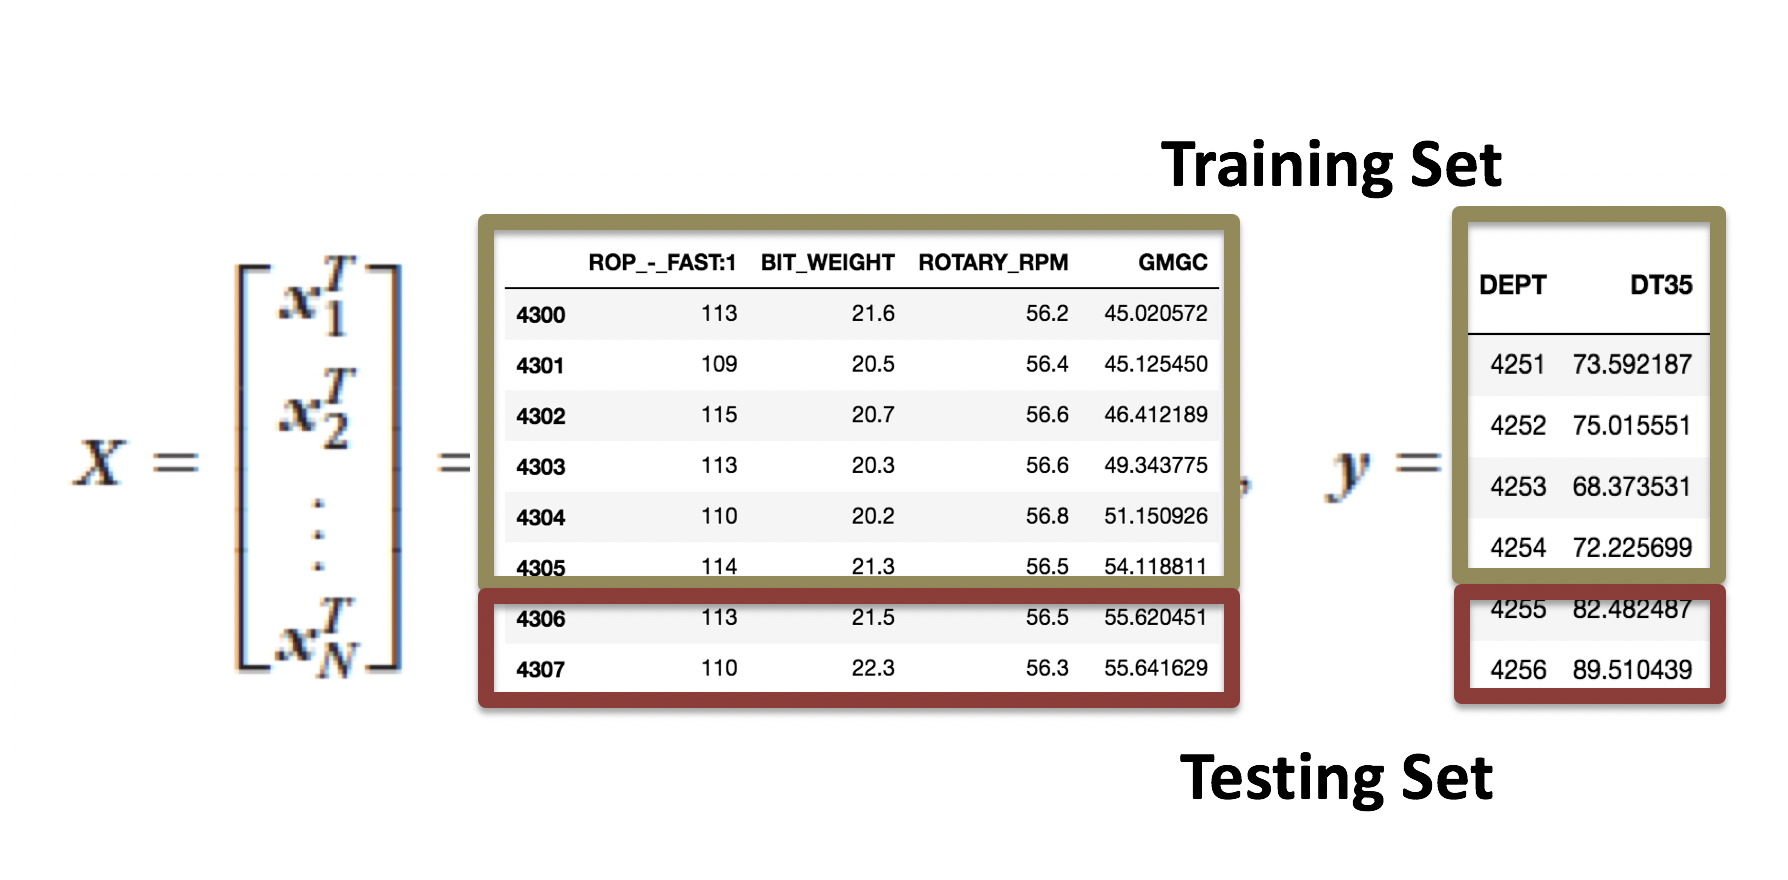

In [18]:
# Let's begin by setting up our VertB and VertC subset datasets.

X_VertB = VertB[['ROP', 'WOB','RPM', 'GR']]
y_VertB = VertB['DT']

X_VertC = VertC[['ROP', 'WOB','RPM', 'GR']]
y_VertC = VertC['DT']

In [19]:
# First we will use VertB to predict VertC and then VertC to predict VertB.
# We will now divide out data into a training and test sets using a rather handy function.
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

from sklearn.model_selection import train_test_split

train_X_VertB, test_X_VertB, train_y_VertB, test_y_VertB = train_test_split(X_VertB, y_VertB, 
                                                    train_size=0.9,
                                                    test_size=0.1,
                                                    random_state=42)

train_X_VertC, test_X_VertC, train_y_VertC, test_y_VertC = train_test_split(X_VertC, y_VertC, 
                                                    train_size=0.9,
                                                    test_size=0.1,
                                                    random_state=42)

In [20]:
# We will use a neighbour based method for regression.

from sklearn.neighbors import KNeighborsRegressor

kneighbor_regression = KNeighborsRegressor(n_neighbors=5,n_jobs=-1)

kneighbor_regression.fit(train_X_VertB, train_y_VertB)
VertB_test = kneighbor_regression.predict(test_X_VertB)

In [21]:
# Take a look at test results on a crossplot

x = test_y_VertB
y = VertB_test

p = figure(title='VertB DT Crossplot', plot_width=600, plot_height=600)
r1 = p.circle(x, y, color='orange', line_width=0.25,legend='DT')
p.xaxis.axis_label = 'VertB Actual'
p.yaxis.axis_label = 'VertB Prediction'
p.legend.location = 'bottom_right'
show(p)

In [22]:
# Now we take the model we just trained and use it to predict DT for VertC
VertC_Pred_DT_KNR = kneighbor_regression.predict(X_VertC)

In [23]:
# Plot results of VertC prediction

x = VertC['DEPT']
y = VertC['DT']
z = VertC_Pred_DT_KNR

p = figure(title='VertC Predicted DTCO using KNR', plot_width=600, plot_height=300)
r = p.line(x, y, color='green', line_width=0.5,legend='DT')
r1 = p.line(x, z, color='blue', line_width=0.5,legend='Pred. DT')
p.xaxis.axis_label = 'Depth (ft)'
p.yaxis.axis_label = 'Delta Time (ms/ft)'
p.legend.location = 'top_left'
show(p)

In [24]:
# Now train on VertC to predict VertB
kneighbor_regression.fit(train_X_VertC, train_y_VertC)

VertC_test = kneighbor_regression.predict(test_X_VertC)

In [25]:
# Take a look at test results on a crossplot

x = test_y_VertC
y = VertC_test

p = figure(title='VertC DT Crossplot', plot_width=600, plot_height=600)
r1 = p.circle(x, y, color='orange', line_width=0.25,legend='DT')
p.xaxis.axis_label = 'VertC Actual'
p.yaxis.axis_label = 'VertC Prediction'
p.legend.location = 'bottom_right'
show(p)

In [26]:
VertB_Pred_DT_KNR = kneighbor_regression.predict(X_VertB)

In [27]:
x = VertB['DEPT']
y = VertB['DT']
z = VertB_Pred_DT_KNR

p = figure(title='VertB Predicted DT using KNR', plot_width=600, plot_height=300)
r = p.line(x, y, color='green', line_width=0.25,legend='DT')
r1 = p.line(x, z, color='blue', line_width=0.25,legend='Pred. DT')
p.xaxis.axis_label = 'Depth (ft)'
p.yaxis.axis_label = 'Delta Time (ms/ft)'
p.legend.location = 'top_left'
show(p)

In [28]:
# We will now use mean absolute error to compare performance.
from sklearn.metrics import mean_absolute_error

error_VertB_model = mean_absolute_error(y_VertC, VertC_Pred_DT_KNR)
error_VertC_model = mean_absolute_error(y_VertB, VertB_Pred_DT_KNR)

In [29]:
# Lots of metrics are available.
from sklearn.metrics.scorer import SCORERS
print(SCORERS.keys())

dict_keys(['explained_variance', 'r2', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'median_absolute_error', 'mean_absolute_error', 'mean_squared_error', 'accuracy', 'roc_auc', 'average_precision', 'log_loss', 'neg_log_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted'])


In [30]:
y_VertC.mean()

72.91148947662933

In [31]:
error_VertB_model

8.119549065734036

In [32]:
y_VertB.mean()

70.41306066111

In [33]:
error_VertC_model

7.0298434498881885

In [34]:
# Can we make this prediction better? Let's try a different regression method in sklearn.
# http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

from sklearn.svm import SVR
svr = SVR(kernel='linear',C=1232, gamma=10)

In [35]:
# SVR works much faster when data is normalized.

from sklearn.preprocessing import Normalizer

scaler = Normalizer().fit(VertB[['ROP','WOB','RPM','GR']])
normalized_VertB = scaler.transform(VertB[['ROP','WOB','RPM','GR']])

scaler = Normalizer().fit(VertC[['ROP','WOB','RPM','GR']])
normalized_VertC = scaler.transform(VertC[['ROP','WOB','RPM','GR']])

# Convert back to pandas dataframes
normalized_VertB = pd.DataFrame(normalized_VertB,columns=[['ROP','WOB','RPM','GR']])
normalized_VertC = pd.DataFrame(normalized_VertC,columns=[['ROP','WOB','RPM','GR']])

In [36]:
# Split the normalized data into training and test sets

train_X_VertB, test_X_VertB, train_y_VertB, test_y_VertB = train_test_split(normalized_VertB, y_VertB, 
                                                    train_size=0.9,
                                                    test_size=0.1,
                                                    random_state=42)

train_X_VertC, test_X_VertC, train_y_VertC, test_y_VertC = train_test_split(normalized_VertC, y_VertC, 
                                                    train_size=0.9,
                                                    test_size=0.1,
                                                    random_state=42)

In [37]:
# Fit VertB and predict VertC
VertBtoVertC_DT = svr.fit(train_X_VertB, train_y_VertB)
VertC_Pred_DT = VertBtoVertC_DT.predict(normalized_VertC)

In [38]:
x = VertC['DEPT']
y = VertC['DT']
z = VertC_Pred_DT
z1 = VertC_Pred_DT_KNR

p = figure(title='VertC Predicted DT using SVR', plot_width=600, plot_height=300)
r = p.line(x, y, color='green', line_width=0.5,legend='DT')
r1 = p.line(x, z, color='blue', line_width=0.5,legend='Pred. DT SVR')
r2 = p.line(x, z1, color='red', line_width=0.5,legend='Pred. DT KNR')

p.xaxis.axis_label = 'Depth (ft)'
p.yaxis.axis_label = 'Delta Time (ms/ft)'
p.legend.location = 'top_left'
show(p)

In [39]:
# Point of interest. You can view how important each variable is to the prediction with a linear kernel in SVR.
importances = svr.coef_.flatten()
importances

array([ -8.60057201, -37.96867267, -30.3442011 ,  29.01780856])

In [40]:
error_VertB_model = mean_absolute_error(y_VertC, VertC_Pred_DT)
error_VertB_model

7.585577074400368

In [41]:
# Fit VertC and predict VertB
VertCtoVertB_DT = svr.fit(train_X_VertC, train_y_VertC)
VertB_Pred_DT = VertCtoVertB_DT.predict(normalized_VertB)

In [42]:
x = VertB['DEPT']
y = VertB['DT']
z = VertB_Pred_DT
z1 = VertB_Pred_DT_KNR

p = figure(title='VertB Predicted DT using SVR', plot_width=600, plot_height=300)
r = p.line(x, y, color='green', line_width=0.5,legend='DT')
r1 = p.line(x, z, color='blue', line_width=0.5,legend='Pred. DT SVR')
r2 = p.line(x, z1, color='red', line_width=0.5,legend='Pred. DT KNR')

p.xaxis.axis_label = 'Depth (ft)'
p.yaxis.axis_label = 'Delta Time (ms/ft)'
p.legend.location = 'top_left'
show(p)

In [43]:
error_VertC_model = mean_absolute_error(y_VertB, VertB_Pred_DT)
error_VertC_model

6.021257185253799

<div class="alert alert-success">
    <b>EXERCISE 3</b>:
     <ul>
      <li>See if you can predict the density logs in a similar manner.   
      <li>Prepare your data.
      <li>Create your model using SVR or KNR.
      <li>Fit the model on 1st well.
      <li>Predict the model on 2nd well.
      <li>Plot the predicted vs. actual results.
      </li>
    <ul>
   

<div class="alert alert-success">
    <b>EXERCISE 3 SOLUTION START </b>
</div>

In [44]:
# Prepare your data
# Let's begin by setting up our VertB and VertC subset datasets.

X_VertB = VertB[['ROP','WOB','RPM','GR']]
y_VertB = VertB['RHOB']

X_VertC = VertC[['ROP','WOB','RPM','GR']]
y_VertC = VertC['RHOB']

In [45]:
# SVR works much faster when data is normalized.

scaler = Normalizer().fit(VertB[['ROP','WOB','RPM','GR']])
normalized_VertB = scaler.transform(VertB[['ROP','WOB','RPM','GR']])

scaler = Normalizer().fit(VertC[['ROP','WOB','RPM','GR']])
normalized_VertC = scaler.transform(VertC[['ROP','WOB','RPM','GR']])

# Convert back to pandas dataframes
normalized_VertB = pd.DataFrame(normalized_VertB,columns=[['ROP','WOB','RPM','GR']])
normalized_VertC = pd.DataFrame(normalized_VertC,columns=[['ROP','WOB','RPM','GR']])

In [46]:
# Split the normalized data into training and test sets

train_X_VertB, test_X_VertB, train_y_VertB, test_y_VertB = train_test_split(normalized_VertB, y_VertB, 
                                                    train_size=0.9,
                                                    test_size=0.1,
                                                    random_state=42)

train_X_VertC, test_X_VertC, train_y_VertC, test_y_VertC = train_test_split(normalized_VertC, y_VertC, 
                                                    train_size=0.9,
                                                    test_size=0.1,
                                                    random_state=42)

In [47]:
# Fit VertB and predict VertC
VertBtoVertC_RHOB = svr.fit(train_X_VertB, train_y_VertB)
VertC_Pred_RHOB = VertBtoVertC_RHOB.predict(normalized_VertC)

In [48]:
x = VertC['DEPT']
y = VertC['RHOB']
z = VertC_Pred_RHOB


p = figure(title='VertC Predicted RHOB using SVR', plot_width=600, plot_height=300)
r = p.line(x, y, color='green', line_width=0.5,legend='RHOB')
r1 = p.line(x, z, color='blue', line_width=0.5,legend='Pred. RHOB SVR')

p.xaxis.axis_label = 'Depth (ft)'
p.yaxis.axis_label = 'Density (g/cc)'
p.legend.location = 'bottom_right'
show(p)

<div class="alert alert-success">
    <b>EXERCISE 3 SOLUTION END </b>
</div>

We are now going to start to tune our model. There isn't really a general rule for finding the sweet spot. We will start by ranking our features based on what the model determines is important. We will then perform a grid step search looking for the right settings to get the 'best' model performance. 

For recursive feature elimination we need to add back all the overlapping data between VertB and VertC.

In [49]:
print(VertB.columns.tolist())

['DEPT', 'DT', 'GR', 'ROP', 'WOB', 'RPM', 'RHOB', 'NPHI']


In [50]:
print(VertC.columns.tolist())

['DEPT', 'DT', 'GR', 'ROP', 'WOB', 'RPM', 'RHOB', 'NPHI']


In [51]:
X_VertB = VertB[['GR', 'ROP', 'WOB', 'RPM', 'RHOB', 'NPHI']]
y_VertB = VertB['DT']

X_VertC = VertC[['GR', 'ROP', 'WOB', 'RPM', 'RHOB', 'NPHI']]
y_VertC = VertC['DT']

In [52]:
# SVR works much faster when data is normalized.

scaler = Normalizer().fit(VertB[['GR', 'ROP', 'WOB', 'RPM', 'RHOB', 'NPHI']])
normalized_VertB = scaler.transform(VertB[['GR', 'ROP', 'WOB', 'RPM', 'RHOB', 'NPHI']])

scaler = Normalizer().fit(VertC[['GR', 'ROP', 'WOB', 'RPM', 'RHOB', 'NPHI']])
normalized_VertC = scaler.transform(VertC[['GR', 'ROP', 'WOB', 'RPM', 'RHOB', 'NPHI']])

# Convert back to pandas dataframes
normalized_VertB = pd.DataFrame(normalized_VertB,columns=[['GR', 'ROP', 'WOB', 'RPM', 'RHOB', 'NPHI']])
normalized_VertC = pd.DataFrame(normalized_VertC,columns=[['GR', 'ROP', 'WOB', 'RPM', 'RHOB', 'NPHI']])

The recursive feature elimination (RFE) module selects subsets of features. The estimator is trained on all the features in question and an importance ranking is obtained. The least important feature is dropped recursively until the specified number of features is obtained.

In [53]:
# http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html
# We are arbtrarily asking the machine to select the four best features for this model.

from sklearn.feature_selection import RFE

select = RFE(svr,n_features_to_select=4)

In [54]:
select.fit(normalized_VertB, y_VertB)
normalized_VertB_FS = select.transform(normalized_VertB)
print(normalized_VertB.shape)
print(normalized_VertB_FS.shape)

(4919, 6)
(4919, 4)


In [55]:
#RFE.get_support?

In [56]:
mask = select.get_support()
mask

array([False,  True, False,  True,  True,  True])

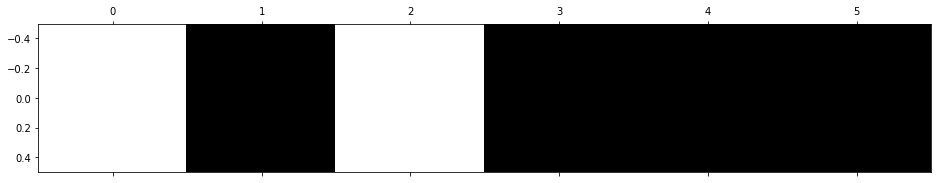

In [57]:
# Plot the mask. Black is True, White is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')

In [58]:
normalized_VertB.columns.tolist()

[('GR',), ('ROP',), ('WOB',), ('RPM',), ('RHOB',), ('NPHI',)]

In [59]:
normalized_VertB_FS = pd.DataFrame(normalized_VertB_FS,columns=[['ROP', 'RPM', 'RHOB', 'NPHI']])

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold

cv = KFold(n_splits=5, random_state=42, shuffle=True)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 1232], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(SVR(), param_grid=param_grid, cv=cv, verbose=1, return_train_score=True, n_jobs=-1)

In [61]:
#GridSearchCV?

In [62]:
grid.fit(normalized_VertB_FS, y_VertB)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   34.7s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   48.4s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
       error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 1232], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [63]:
# We can view more detailed results using the cv_results_ variable
#cv_results = pd.DataFrame(grid.cv_results_)
#cv_results.head(48)

In [64]:
print(grid.best_score_)

0.8756727663370413


In [65]:
print(grid.best_params_)

{'C': 1232, 'gamma': 10}


In [66]:
# Take the hyperparameter tuned model with RFE to predict DT for VertC.
hypertune_SVR = grid.predict(normalized_VertC[['ROP', 'RPM', 'RHOB', 'NPHI']])

In [67]:
x = VertC['DEPT']
y = VertC['DT']
z = VertC_Pred_DT
z1 = VertC_Pred_DT_KNR
z2 = hypertune_SVR

p = figure(title='VertC Predicted DT using SVR', plot_width=600, plot_height=300)
r = p.line(x, y, color='green', line_width=0.5,legend='DT')
r1 = p.line(x, z, color='blue', line_width=0.5,legend='Pred. DT SVR')
r2 = p.line(x, z1, color='red', line_width=0.5,legend='Pred. DT KNR')
r3 = p.line(x, z2, color='orange', line_width=0.5,legend='hypertune_SVR')

p.xaxis.axis_label = 'Depth (ft)'
p.yaxis.axis_label = 'Delta Time (ms/ft)'
p.legend.location = 'bottom_right'
show(p)

In [68]:
# Calculate MAE so we can compare model performance before and after tuning.
error_VertB_hypertune_model = mean_absolute_error(y_VertC, hypertune_SVR)
print(error_VertB_hypertune_model)
print(error_VertB_model)

5.680406251279293
7.585577074400368


<div class="alert alert-success">
    <b>EXERCISE 4</b>:
     <ul>
      <li>See if you can predict the density and porosity logs in a similar manner. 
      <li>Prepare your data. 
      <li>Create your model using SVR, KNR, etc. 
      <li>Fit the model on 1st well. 
      <li>Predict the model on 2nd, 3rd, etc. 
      <li>Plot the predicted vs. actual results. 
      <li>Perform RFE and hyperparameter tuning. Plot all results. 
      </li>
    </ul>
</div>

<div class="alert alert-success">
    <b>EXERCISE 4 SOLUTION START </b>
</div>

In [69]:
# Start by preparing our data
X_VertB = VertB[['GR', 'ROP', 'WOB', 'RPM', 'DT', 'NPHI']]
y_VertB = VertB['RHOB']

X_VertC = VertC[['GR', 'ROP', 'WOB', 'RPM', 'DT', 'NPHI']]
y_VertC = VertC['RHOB']

In [70]:
# SVR works much faster when data is normalized.

scaler = Normalizer().fit(VertB[['GR', 'ROP', 'WOB', 'RPM', 'DT', 'NPHI']])
normalized_VertB = scaler.transform(VertB[['GR', 'ROP', 'WOB', 'RPM', 'DT', 'NPHI']])

scaler = Normalizer().fit(VertC[['GR', 'ROP', 'WOB', 'RPM', 'DT', 'NPHI']])
normalized_VertC = scaler.transform(VertC[['GR', 'ROP', 'WOB', 'RPM', 'DT', 'NPHI']])

# Convert back to pandas dataframes
normalized_VertB = pd.DataFrame(normalized_VertB,columns=[['GR', 'ROP', 'WOB', 'RPM', 'DT', 'NPHI']])
normalized_VertC = pd.DataFrame(normalized_VertC,columns=[['GR', 'ROP', 'WOB', 'RPM', 'DT', 'NPHI']])

In [71]:
# http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html
# We are arbtrarily asking the machine to select the four best features for this model.

select = RFE(svr,n_features_to_select=4)

In [72]:
select.fit(normalized_VertB, y_VertB)
normalized_VertB_FS = select.transform(normalized_VertB)
print(normalized_VertB.shape)
print(normalized_VertB_FS.shape)

(4919, 6)
(4919, 4)


In [73]:
mask = select.get_support()
mask

array([False, False,  True,  True,  True,  True])

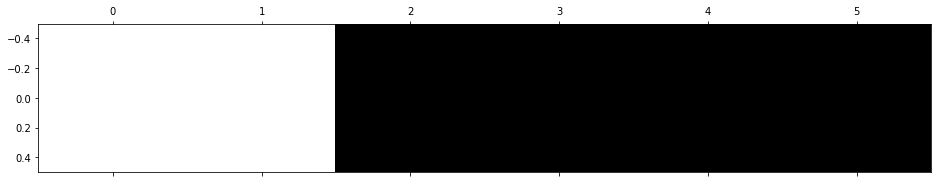

In [74]:
# Plot the mask. Black is True, White is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')

In [75]:
normalized_VertB.columns.tolist()

[('GR',), ('ROP',), ('WOB',), ('RPM',), ('DT',), ('NPHI',)]

In [76]:
# Set columns to what was selected by RFE.
normalized_VertB_FS = pd.DataFrame(normalized_VertB_FS,columns=[['WOB', 'RPM', 'DT', 'NPHI']])

In [77]:
cv = KFold(n_splits=5, random_state=42, shuffle=True)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 1232], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(SVR(), param_grid=param_grid, cv=cv, verbose=1, return_train_score=True, n_jobs=-1)

In [78]:
grid.fit(normalized_VertB_FS, y_VertB)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   14.6s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
       error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 1232], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [79]:
print(grid.best_score_)

0.2480690453078154


In [80]:
print(grid.best_params_)

{'C': 1232, 'gamma': 1}


In [81]:
# Take the hyperparameter tuned model with RFE to predict DTCO for VertC.
hypertune_SVR = grid.predict(normalized_VertC[['WOB', 'RPM', 'DT', 'NPHI']])

In [82]:
x = VertC['DEPT']
y = VertC['RHOB']
z = hypertune_SVR

p = figure(title='VertC Predicted RHOB using SVR', plot_width=800, plot_height=300)
r = p.line(x, y, color='green', line_width=0.5,legend='Density')
r1 = p.line(x, z, color='blue', line_width=0.5,legend='Pred. RHOB SVR')

p.xaxis.axis_label = 'Depth (ft)'
p.yaxis.axis_label = 'Density (g/cc)'
p.legend.location = 'bottom_left'
show(p)

<div class="alert alert-success">
    <b>EXERCISE 4 SOLUTION END </b>
</div>

In [83]:
# How does more data affect the result?
# Let's concatenate A,B,C,D and predict E for DT 

In [84]:
VertA = pd.read_excel('VertA_merge.xlsx')
VertB = pd.read_excel('VertB_merge.xlsx')
VertC = pd.read_excel('VertC_merge.xlsx')
VertD = pd.read_excel('VertD_merge.xlsx')
VertE = pd.read_excel('VertE_merge.xlsx')

In [85]:
# Correct porosity units NPRL:1 = NPOR = NPOR:1
# These values need to be made the same.
VertA['NPOR:1'] = VertA['NPOR:1']/100
VertB['NPRL:1'] = VertB['NPRL:1']/100
VertD['NPRL:1'] = VertD['NPRL:1']/100

In [86]:
# Merge A, B, C, D, and predict DT for E.
# And standardize column names.
# My RPM column for VertA is all zeros. 
# We might be able to use 'TOP_DRIVE_RPM' as a substitute.

VertA_subset = VertA[['DEPT','DT35','GMSG','ROP_-_FAST:1','BIT_WEIGHT','TOP_DRIVE_RPM','DEN','NPOR:1']]
VertB_subset = VertB[['DEPT','DT35','GMGC','ROP_-_FAST:1','BIT_WEIGHT','ROTARY_RPM','DEN','NPRL:1']]
VertC_subset = VertC[['DEPT','DTCO','GR','ROP_-_FAST:1','BIT_WEIGHT','ROTARY_RPM','RHOB','NPOR']]
VertD_subset = VertD[['DEPT','MCDT','GMGC','ROP_-_FAST:1','BIT_WEIGHT','ROTARY_RPM','DEN','NPRL:1']]
VertE_subset = VertE[['DEPT','DT','GRTO','ROP','WOB','RPM','RHOB','NPHI']]


VertA_subset = VertA_subset.rename(index=str,columns={"DT35":"DT","GMSG":"GR","ROP_-_FAST:1":"ROP","BIT_WEIGHT":"WOB","TOP_DRIVE_RPM":"RPM","DEN":"RHOB","NPOR:1":"NPHI"})
VertB_subset = VertB_subset.rename(index=str,columns={"DT35":"DT","GMGC":"GR","ROP_-_FAST:1":"ROP","BIT_WEIGHT":"WOB","ROTARY_RPM":"RPM","DEN":"RHOB","NPRL:1":"NPHI"})
VertC_subset = VertC_subset.rename(index=str,columns={"DTCO":"DT","GR":"GR","ROP_-_FAST:1":"ROP","BIT_WEIGHT":"WOB","ROTARY_RPM":"RPM","RHOB":"RHOB","NPOR":"NPHI"})
VertD_subset = VertD_subset.rename(index=str,columns={"MCDT":"DT","GMGC":"GR","ROP_-_FAST:1":"ROP","BIT_WEIGHT":"WOB","ROTARY_RPM":"RPM","DEN":"RHOB","NPRL:1":"NPHI"})
VertE_subset = VertE_subset.rename(index=str,columns={"GRTO":"GR"})


frames = [VertA_subset,VertB_subset,VertC_subset,VertD_subset]
mergeABCD = pd.concat(frames,ignore_index=True)

In [87]:
# Setup our X and y matrices
X_VertABCD = mergeABCD[['ROP','WOB','RPM','GR','RHOB','NPHI']]
y_VertABCD = mergeABCD['DT']

X_VertE = VertE_subset[['ROP','WOB','RPM','GR','RHOB','NPHI']]
y_VertE = VertE_subset['DT']

In [88]:
# SVR works much faster when data is normalized.

scaler = Normalizer().fit(X_VertABCD[['ROP','WOB','RPM','GR','RHOB','NPHI']])
normalized_mergeABCD_X = scaler.transform(X_VertABCD[['ROP','WOB','RPM','GR','RHOB','NPHI']])

scaler = Normalizer().fit(VertE_subset[['ROP','WOB','RPM','GR','RHOB','NPHI']])
normalized_VertE_subset_X = scaler.transform(VertE_subset[['ROP','WOB','RPM','GR','RHOB','NPHI']])

# Convert back to pandas dataframes
normalized_mergeABCD_X = pd.DataFrame(normalized_mergeABCD_X,columns=[['ROP','WOB','RPM','GR','RHOB','NPHI']])
normalized_VertE_subset_X = pd.DataFrame(normalized_VertE_subset_X,columns=[['ROP','WOB','RPM','GR','RHOB','NPHI']])

In [89]:
select = RFE(svr,n_features_to_select=4)

In [90]:
select.fit(normalized_mergeABCD_X, y_VertABCD)
normalized_mergeABCD_X_FS = select.transform(normalized_mergeABCD_X)
print(normalized_mergeABCD_X.shape)
print(normalized_mergeABCD_X_FS.shape)

(21898, 6)
(21898, 4)


In [91]:
mask = select.get_support()
mask

array([False, False,  True,  True,  True,  True])

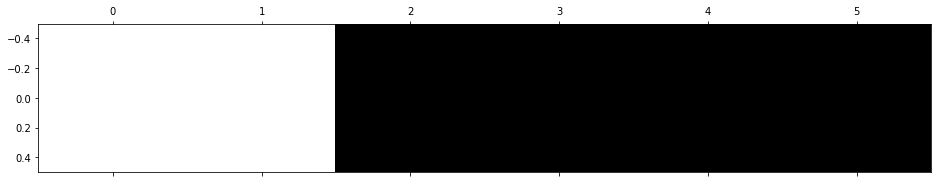

In [92]:
# Plot the mask. Black is True, White is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')

In [93]:
normalized_mergeABCD_X.columns.tolist()

[('ROP',), ('WOB',), ('RPM',), ('GR',), ('RHOB',), ('NPHI',)]

In [94]:
normalized_mergeABCD_X_FS = pd.DataFrame(normalized_mergeABCD_X_FS,columns=[['RPM','GR','RHOB','NPHI']])

In [95]:
# Perform cross-validation and hyperparameter tune.
cv = KFold(n_splits=5, random_state=42, shuffle=True)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 1232], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(SVR(), param_grid=param_grid, cv=cv, verbose=1, return_train_score=True, n_jobs=-1)

grid.fit(normalized_mergeABCD_X_FS, y_VertABCD)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 15.4min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
       error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 1232], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [96]:
print(grid.best_score_)

0.6804552868982565


In [97]:
print(grid.best_params_)

{'C': 1232, 'gamma': 10}


In [98]:
# Take the hyperparameter tuned model with RFE to predict DT for VertE.
hypertune_SVR = grid.predict(normalized_VertE_subset_X[['RPM','GR','RHOB','NPHI']])

In [99]:
x = VertE['DEPT']
y = VertE['DT']
z = hypertune_SVR

p = figure(title='VertE Predicted DT using SVR', plot_width=600, plot_height=300)
r = p.line(x, y, color='green', line_width=0.5,legend='DT')
r1 = p.line(x, z, color='blue', line_width=0.5,legend='Pred. DT SVR')

p.xaxis.axis_label = 'Depth (ft)'
p.yaxis.axis_label = 'DT (ms/ft)'
p.legend.location = 'top_left'
show(p)

<div class="alert alert-success">
    <b>EXERCISE 5</b>:
     <ul>
      <li>Score Pred. DT SVR using mean absolute error.   
</div>

<div class="alert alert-success">
    <b>EXERCISE 5 SOLUTION START </b>
</div>

In [100]:
# Calculate MAE 
error_VertABCD_hypertune_model = mean_absolute_error(y_VertE, hypertune_SVR)
print(error_VertABCD_hypertune_model)

4.009107742139388


<div class="alert alert-success">
    <b>EXERCISE 5 SOLUTION END </b>
</div>

<div class="alert alert-success">
    <b>EXERCISE 6</b>:
     <ul>
      <li> 
       1. Concatenate A,B,C,D and predict E for RHOB
       <li>
       2. Setup X and y matrices.
       <li>
       3. Normalize data and convert back to dataframe.
       <li>
       4. Perform RFE.
       <li>
       5. Perform hyperparameter tuning.
       <li>
       6. Predict VertE with RFE tuned model.
       <li>
       7. Plot VertE RHOB vs. prediction.
    
       
</div>

<div class="alert alert-success">
    <b>EXERCISE 6 SOLUTION START </b>
</div>

In [101]:
# Merge A, B, C, D, and predict DT for E.
# And standardize column names.
# My RPM column for VertA is all zeros. 
# We might be able to use 'TOP_DRIVE_RPM' as a substitute.

VertA_subset = VertA[['DEPT','DT35','GMSG','ROP_-_FAST:1','BIT_WEIGHT','TOP_DRIVE_RPM','DEN','NPOR:1']]
VertB_subset = VertB[['DEPT','DT35','GMGC','ROP_-_FAST:1','BIT_WEIGHT','ROTARY_RPM','DEN','NPRL:1']]
VertC_subset = VertC[['DEPT','DTCO','GR','ROP_-_FAST:1','BIT_WEIGHT','ROTARY_RPM','RHOB','NPOR']]
VertD_subset = VertD[['DEPT','MCDT','GMGC','ROP_-_FAST:1','BIT_WEIGHT','ROTARY_RPM','DEN','NPRL:1']]
VertE_subset = VertE[['DEPT','DT','GRTO','ROP','WOB','RPM','RHOB','NPHI']]


VertA_subset = VertA_subset.rename(index=str,columns={"DT35":"DT","GMSG":"GR","ROP_-_FAST:1":"ROP","BIT_WEIGHT":"WOB","TOP_DRIVE_RPM":"RPM","DEN":"RHOB","NPOR:1":"NPHI"})
VertB_subset = VertB_subset.rename(index=str,columns={"DT35":"DT","GMGC":"GR","ROP_-_FAST:1":"ROP","BIT_WEIGHT":"WOB","ROTARY_RPM":"RPM","DEN":"RHOB","NPRL:1":"NPHI"})
VertC_subset = VertC_subset.rename(index=str,columns={"DTCO":"DT","GR":"GR","ROP_-_FAST:1":"ROP","BIT_WEIGHT":"WOB","ROTARY_RPM":"RPM","RHOB":"RHOB","NPOR":"NPHI"})
VertD_subset = VertD_subset.rename(index=str,columns={"MCDT":"DT","GMGC":"GR","ROP_-_FAST:1":"ROP","BIT_WEIGHT":"WOB","ROTARY_RPM":"RPM","DEN":"RHOB","NPRL:1":"NPHI"})
VertE_subset = VertE_subset.rename(index=str,columns={"GRTO":"GR"})


frames = [VertA_subset,VertB_subset,VertC_subset,VertD_subset]
mergeABCD = pd.concat(frames,ignore_index=True)

In [102]:
# Setup our X and y matrices
X_VertABCD = mergeABCD[['ROP','WOB','RPM','GR','DT','NPHI']]
y_VertABCD = mergeABCD['RHOB']

X_VertE = VertE_subset[['ROP','WOB','RPM','GR','DT','NPHI']]
y_VertE = VertE_subset['RHOB']

In [103]:
# SVR works much faster when data is normalized.

scaler = Normalizer().fit(X_VertABCD[['ROP','WOB','RPM','GR','DT','NPHI']])
normalized_mergeABCD_X = scaler.transform(X_VertABCD[['ROP','WOB','RPM','GR','DT','NPHI']])

scaler = Normalizer().fit(VertE_subset[['ROP','WOB','RPM','GR','DT','NPHI']])
normalized_VertE_subset_X = scaler.transform(VertE_subset[['ROP','WOB','RPM','GR','DT','NPHI']])

# Convert back to pandas dataframes
normalized_mergeABCD_X = pd.DataFrame(normalized_mergeABCD_X,columns=[['ROP','WOB','RPM','GR','DT','NPHI']])
normalized_VertE_subset_X = pd.DataFrame(normalized_VertE_subset_X,columns=[['ROP','WOB','RPM','GR','DT','NPHI']])

In [104]:
select = RFE(svr,n_features_to_select=4)

select.fit(normalized_mergeABCD_X, y_VertABCD)
normalized_mergeABCD_X_FS = select.transform(normalized_mergeABCD_X)
print(normalized_mergeABCD_X.shape)
print(normalized_mergeABCD_X_FS.shape)

(21898, 6)
(21898, 4)


In [105]:
mask = select.get_support()
mask

array([ True, False,  True, False,  True,  True])

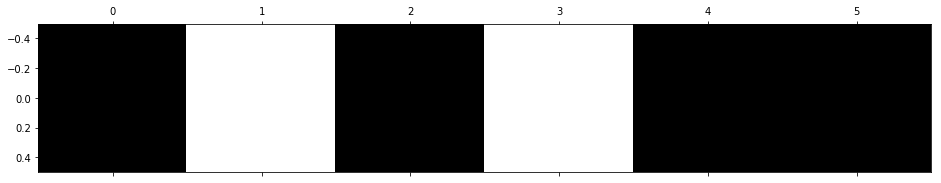

In [106]:
# Plot the mask. Black is True, White is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')

In [107]:
normalized_mergeABCD_X.columns.tolist()

[('ROP',), ('WOB',), ('RPM',), ('GR',), ('DT',), ('NPHI',)]

In [108]:
normalized_mergeABCD_X_FS = pd.DataFrame(normalized_mergeABCD_X_FS,columns=[['ROP','RPM','DT','NPHI']])

In [109]:
# Perform cross-validation and hyperparameter tune.
cv = KFold(n_splits=5, random_state=42, shuffle=True)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 1232], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(SVR(), param_grid=param_grid, cv=cv, verbose=1, return_train_score=True, n_jobs=-1)

grid.fit(normalized_mergeABCD_X_FS, y_VertABCD)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  6.6min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
       error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 1232], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [110]:
print(grid.best_score_)

0.34190698411185094


In [111]:
print(grid.best_params_)

{'C': 1000, 'gamma': 10}


In [112]:
# Take the hyperparameter tuned model with RFE to predict DT for VertE.
hypertune_SVR = grid.predict(normalized_VertE_subset_X[['ROP','RPM','DT','NPHI']])

In [113]:
x = VertE['DEPT']
y = VertE['RHOB']
z = hypertune_SVR

p = figure(title='VertE Predicted RHOB using SVR', plot_width=600, plot_height=300)
r = p.line(x, y, color='green', line_width=0.5,legend='RHOB')
r1 = p.line(x, z, color='blue', line_width=0.5,legend='Pred. RHOB SVR')

p.xaxis.axis_label = 'Depth (ft)'
p.yaxis.axis_label = 'Density (g/cc)'
p.legend.location = 'top_right'
show(p)

<div class="alert alert-success">
    <b>EXERCISE 6 SOLUTION END </b>
</div>

<div class="alert alert-success">
    <b>EXERCISE 7</b>:
     <ul>
      <li> 
       1. Concatenate Matrices and predict E for PE=PDPE.
       Hint: Locate all the wells that have PDPE data.
       <li>
       2. Setup X and y matrices.
       <li>
       3. Normalize data and convert back to dataframe.
       <li>
       4. Perform RFE.
       <li>
       5. Perform hyperparameter tuning.
       <li>
       6. Predict VertE with RFE tuned model.
       <li>
       7. Plot VertE PE vs. prediction.    
</div>

<div class="alert alert-success">
    <b>EXERCISE 7 SOLUTION START </b>
</div>

In [114]:
# Merge A, B, D, and predict PDPE=PE for E.
# And standardize column names.

VertA_subset = VertA[['DEPT','DT35','GMSG','ROP_-_FAST:1','BIT_WEIGHT','TOP_DRIVE_RPM','DEN','NPOR:1','PDPE']]
VertB_subset = VertB[['DEPT','DT35','GMGC','ROP_-_FAST:1','BIT_WEIGHT','ROTARY_RPM','DEN','NPRL:1','PDPE']]
VertD_subset = VertD[['DEPT','MCDT','GMGC','ROP_-_FAST:1','BIT_WEIGHT','ROTARY_RPM','DEN','NPRL:1','PDPE']]
VertE_subset = VertE[['DEPT','DT','GRTO','ROP','WOB','RPM','RHOB','NPHI','PE']]

VertA_subset = VertA_subset.rename(index=str,columns={"DT35":"DT","GMSG":"GR","ROP_-_FAST:1":"ROP","BIT_WEIGHT":"WOB","TOP_DRIVE_RPM":"RPM","DEN":"RHOB","NPOR:1":"NPHI","PDPE":"PE"})
VertB_subset = VertB_subset.rename(index=str,columns={"DT35":"DT","GMGC":"GR","ROP_-_FAST:1":"ROP","BIT_WEIGHT":"WOB","ROTARY_RPM":"RPM","DEN":"RHOB","NPRL:1":"NPHI","PDPE":"PE"})
VertD_subset = VertD_subset.rename(index=str,columns={"MCDT":"DT","GMGC":"GR","ROP_-_FAST:1":"ROP","BIT_WEIGHT":"WOB","ROTARY_RPM":"RPM","DEN":"RHOB","NPRL:1":"NPHI","PDPE":"PE"})
VertE_subset = VertE_subset.rename(index=str,columns={"GRTO":"GR"})

frames = [VertA_subset,VertB_subset,VertD_subset]
mergeABD = pd.concat(frames,ignore_index=True)

In [115]:
mergeABD.head()

DEPT         DT         GR  ROP   WOB   RPM      RHOB      NPHI         PE
0  4251  73.592187  58.612185   41  29.8  60.0  2.170399  0.318645  12.646755
1  4252  75.015551  58.635367   45  29.5  59.9  2.228238  0.294947  12.374189
2  4253  68.373531  53.440719   47  29.7  59.8  2.270799  0.287560  12.052490
3  4254  72.225699  56.699988   37  29.8  59.4  2.297231  0.289341  12.007567
4  4255  82.482487  72.562314   39  29.9  59.2  2.317372  0.290554  12.049351

In [116]:
# Setup our X and y matrices
X_VertABD = mergeABD[['DT','GR','ROP','WOB','RPM','RHOB','NPHI']]
y_VertABD = mergeABD['PE']

X_VertE = VertE_subset[['DT','GR','ROP','WOB','RPM','RHOB','NPHI']]
y_VertE = VertE_subset['PE']

In [117]:
# SVR works much faster when data is normalized.

scaler = Normalizer().fit(X_VertABD[['DT','GR','ROP','WOB','RPM','RHOB','NPHI']])
normalized_mergeABD_X = scaler.transform(X_VertABD[['DT','GR','ROP','WOB','RPM','RHOB','NPHI']])

scaler = Normalizer().fit(VertE_subset[['DT','GR','ROP','WOB','RPM','RHOB','NPHI']])
normalized_VertE_subset_X = scaler.transform(VertE_subset[['DT','GR','ROP','WOB','RPM','RHOB','NPHI']])

# Convert back to pandas dataframes
normalized_mergeABD_X = pd.DataFrame(normalized_mergeABD_X,columns=[['DT','GR','ROP','WOB','RPM','RHOB','NPHI']])
normalized_VertE_subset_X = pd.DataFrame(normalized_VertE_subset_X,columns=[['DT','GR','ROP','WOB','RPM','RHOB','NPHI']])

In [118]:
select = RFE(svr,n_features_to_select=4)

select.fit(normalized_mergeABD_X, y_VertABD)
normalized_mergeABD_X_FS = select.transform(normalized_mergeABD_X)
print(normalized_mergeABD_X.shape)
print(normalized_mergeABD_X_FS.shape)

(15822, 7)
(15822, 4)


In [119]:
mask = select.get_support()
mask

array([ True,  True, False, False, False,  True,  True])

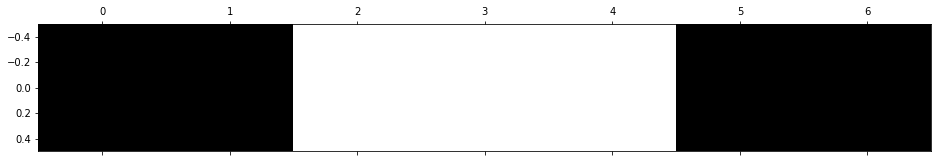

In [120]:
# Plot the mask. Black is True, White is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')

In [121]:
normalized_mergeABD_X.columns.tolist()

[('DT',), ('GR',), ('ROP',), ('WOB',), ('RPM',), ('RHOB',), ('NPHI',)]

In [122]:
normalized_mergeABD_X_FS = pd.DataFrame(normalized_mergeABD_X_FS,columns=[['DT','GR','RHOB','NPHI']])

In [123]:
# Perform cross-validation and hyperparameter tune.
cv = KFold(n_splits=5, random_state=42, shuffle=True)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 1232], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(SVR(), param_grid=param_grid, cv=cv, verbose=1, return_train_score=True, n_jobs=-1)

grid.fit(normalized_mergeABD_X_FS, y_VertABD)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  8.0min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
       error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 1232], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [124]:
print(grid.best_score_)

0.422347965740481


In [125]:
print(grid.best_params_)

{'C': 1232, 'gamma': 10}


In [126]:
# Take the hyperparameter tuned model with RFE to predict DT for VertE.
hypertune_SVR = grid.predict(normalized_VertE_subset_X[['DT','GR','RHOB','NPHI']])

In [127]:
x = VertE['DEPT']
y = VertE['PE']
z = hypertune_SVR

p = figure(title='VertE Predicted PE using SVR', plot_width=800, plot_height=300)
r = p.line(x, y, color='green', line_width=0.5,legend='PE')
r1 = p.line(x, z, color='blue', line_width=0.5,legend='Pred. PE SVR')

p.xaxis.axis_label = 'Depth (ft)'
p.yaxis.axis_label = 'PE'
p.legend.location = 'top_right'
show(p)

<div class="alert alert-success">
    <b>EXERCISE 7 SOLUTION END </b>
</div>

<div class="alert alert-success">
    <b>EXERCISE 8</b>:
     <ul>
      <li> 
       1. Cut VertC log in roughly half.
       <li>
       2. Setup X and y matrices to predict DTSM.
       <li>
       3. Normalize data and convert back to dataframe.
       <li>
       4. Perform RFE.
       <li>
       5. Perform hyperparameter tuning.
       <li>
       6. Predict remainder of VertC with RFE tuned model.
       <li>
       7. Plot VertC DTSM vs. prediction.    
<div>

<div class="alert alert-success">
    <b>EXERCISE 8 SOLUTION START </b>
</div>

In [128]:
VertC = pd.read_excel('VertC_merge.xlsx')

In [129]:
VertC_upper = VertC.loc[(VertC['DEPT']>=4030)&(VertC['DEPT']<=7095),['DEPT', 'DTCO', 'DTSM', 'GR', 'NPOR', 'RHOB', 'UCS', 'ROP_-_FAST:1', 'BIT_WEIGHT', 'ROTARY_RPM']]
VertC_lower = VertC.loc[(VertC['DEPT']>=7095)&(VertC['DEPT']<=10159),['DEPT', 'DTCO', 'DTSM', 'GR', 'NPOR', 'RHOB', 'UCS', 'ROP_-_FAST:1', 'BIT_WEIGHT', 'ROTARY_RPM']]


In [130]:
# Setup our X and y matrices
X_VertC_upper = VertC_upper[['DEPT', 'DTCO', 'GR', 'NPOR', 'RHOB', 'UCS', 'ROP_-_FAST:1', 'BIT_WEIGHT', 'ROTARY_RPM']]
y_VertC_upper = VertC_upper['DTSM']

X_VertC_lower = VertC_lower[['DEPT', 'DTCO', 'GR', 'NPOR', 'RHOB', 'UCS', 'ROP_-_FAST:1', 'BIT_WEIGHT', 'ROTARY_RPM']]
y_VertC_lower = VertC_lower['DTSM']

In [131]:
scaler = Normalizer().fit(X_VertC_upper[['DTCO', 'GR', 'NPOR', 'RHOB', 'UCS', 'ROP_-_FAST:1', 'BIT_WEIGHT', 'ROTARY_RPM']])
normalized_X_VertC_upper = scaler.transform(X_VertC_upper[['DTCO', 'GR', 'NPOR', 'RHOB', 'UCS', 'ROP_-_FAST:1', 'BIT_WEIGHT', 'ROTARY_RPM']])

scaler = Normalizer().fit(X_VertC_lower[['DTCO', 'GR', 'NPOR', 'RHOB', 'UCS', 'ROP_-_FAST:1', 'BIT_WEIGHT', 'ROTARY_RPM']])
normalized_X_VertC_lower = scaler.transform(X_VertC_lower[['DTCO', 'GR', 'NPOR', 'RHOB', 'UCS', 'ROP_-_FAST:1', 'BIT_WEIGHT', 'ROTARY_RPM']])

# Convert back to pandas dataframes
normalized_X_VertC_upper = pd.DataFrame(normalized_X_VertC_upper,columns=[['DTCO', 'GR', 'NPOR', 'RHOB', 'UCS', 'ROP_-_FAST:1', 'BIT_WEIGHT', 'ROTARY_RPM']])
normalized_X_VertC_lower = pd.DataFrame(normalized_X_VertC_lower,columns=[['DTCO', 'GR', 'NPOR', 'RHOB', 'UCS', 'ROP_-_FAST:1', 'BIT_WEIGHT', 'ROTARY_RPM']])


In [132]:
select = RFE(svr,n_features_to_select=4)

In [133]:
select.fit(normalized_X_VertC_upper, y_VertC_upper)
normalized_X_VertC_upper_FS = select.transform(normalized_X_VertC_upper)
print(normalized_X_VertC_upper.shape)
print(normalized_X_VertC_upper_FS.shape)

(3044, 8)
(3044, 4)


In [134]:
mask = select.get_support()
mask

array([ True,  True, False, False, False, False,  True,  True])

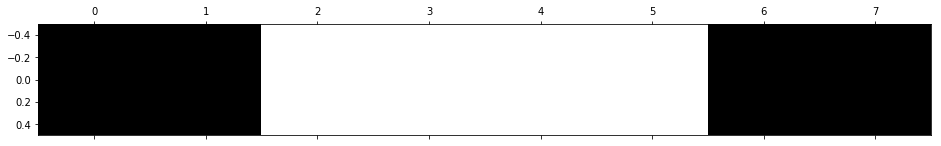

In [135]:
# Plot the mask. Black is True, White is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')

In [136]:
normalized_X_VertC_upper.columns.tolist()

[('DTCO',),
 ('GR',),
 ('NPOR',),
 ('RHOB',),
 ('UCS',),
 ('ROP_-_FAST:1',),
 ('BIT_WEIGHT',),
 ('ROTARY_RPM',)]

In [137]:
normalized_X_VertC_upper_FS = pd.DataFrame(normalized_X_VertC_upper_FS,columns=[['DTCO','GR','BIT_WEIGHT','ROTARY_RPM']])

In [139]:
# Perform cross-validation and hyperparameter tune.
cv = KFold(n_splits=5, random_state=42, shuffle=True)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 1232], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(SVR(), param_grid=param_grid, cv=cv, verbose=1, return_train_score=True, n_jobs=-1)

grid.fit(normalized_X_VertC_upper_FS, y_VertC_upper)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   15.9s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
       error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 1232], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [140]:
print(grid.best_params_)

{'C': 1232, 'gamma': 10}


In [141]:
# Take the hyperparameter tuned model with RFE to predict DTSM for VertC_lower.
hypertune_SVR = grid.predict(normalized_X_VertC_lower[['DTCO','GR','BIT_WEIGHT','ROTARY_RPM']])

In [142]:
x = X_VertC_lower['DEPT']
y = y_VertC_lower
z = hypertune_SVR

p = figure(title='VertC_lower Predicted DTSM using SVR', plot_width=600, plot_height=300)
r = p.line(x, y, color='green', line_width=0.5,legend='DTSM')
r1 = p.line(x, z, color='blue', line_width=0.5,legend='Pred. DTSM SVR')

p.xaxis.axis_label = 'Depth (ft)'
p.yaxis.axis_label = 'DTSM (ms/ft)'
p.legend.location = 'top_left'
show(p)

<div class="alert alert-success">
    <b>EXERCISE 8 SOLUTION END </b>
</div>

<div class="alert alert-success">
    <b>EXERCISE 9</b>:
     <ul>
      <li> 
       Lets pretend to be geologists unless you are a real one (separate assignment).
       <li>
       1. Cut out the section of every well between 5000 and 6000 feet.
       <li>
       2. Concatenate 4 of the wells and use them to predict DT for the 5th well.
       <li>
       3. Setup X and y matrices to predict DT.
       <li>
       4. Perform RFE.
       <li>
       5. Perform hyperparameter tuning.
       <li>
       6. Predict 5th Well.
       <li>
       7. Plot prediction vs. actual.
<div>

<div class="alert alert-success">
    <b>EXERCISE 9 SOLUTION START </b>
</div>

In [143]:
VertA = pd.read_excel('VertA_merge.xlsx')
VertB = pd.read_excel('VertB_merge.xlsx')
VertC = pd.read_excel('VertC_merge.xlsx')
VertD = pd.read_excel('VertD_merge.xlsx')
VertE = pd.read_excel('VertE_merge.xlsx')

In [144]:
# Correct porosity units NPRL:1 = NPOR = NPOR:1
# These values need to be made the same.
VertA['NPOR:1'] = VertA['NPOR:1']/100
VertB['NPRL:1'] = VertB['NPRL:1']/100
VertD['NPRL:1'] = VertD['NPRL:1']/100

In [145]:
# Standardize column names.

VertA = VertA[['DEPT','DT35','GMSG','ROP_-_FAST:1','BIT_WEIGHT','TOP_DRIVE_RPM','DEN','NPOR:1']]
VertB = VertB[['DEPT','DT35','GMGC','ROP_-_FAST:1','BIT_WEIGHT','ROTARY_RPM','DEN','NPRL:1']]
VertC = VertC[['DEPT','DTCO','GR','ROP_-_FAST:1','BIT_WEIGHT','ROTARY_RPM','RHOB','NPOR']]
VertD = VertD[['DEPT','MCDT','GMGC','ROP_-_FAST:1','BIT_WEIGHT','ROTARY_RPM','DEN','NPRL:1']]
VertE = VertE[['DEPT','DT','GRTO','ROP','WOB','RPM','RHOB','NPHI']]


VertA = VertA.rename(index=str,columns={"DT35":"DT","GMSG":"GR","ROP_-_FAST:1":"ROP","BIT_WEIGHT":"WOB","TOP_DRIVE_RPM":"RPM","DEN":"RHOB","NPOR:1":"NPHI"})
VertB = VertB.rename(index=str,columns={"DT35":"DT","GMGC":"GR","ROP_-_FAST:1":"ROP","BIT_WEIGHT":"WOB","ROTARY_RPM":"RPM","DEN":"RHOB","NPRL:1":"NPHI"})
VertC = VertC.rename(index=str,columns={"DTCO":"DT","GR":"GR","ROP_-_FAST:1":"ROP","BIT_WEIGHT":"WOB","ROTARY_RPM":"RPM","RHOB":"RHOB","NPOR":"NPHI"})
VertD = VertD.rename(index=str,columns={"MCDT":"DT","GMGC":"GR","ROP_-_FAST:1":"ROP","BIT_WEIGHT":"WOB","ROTARY_RPM":"RPM","DEN":"RHOB","NPRL:1":"NPHI"})
VertE = VertE.rename(index=str,columns={"GRTO":"GR"})

In [146]:
# Slice out 5000ft to 6000ft on each log. # You can play with different depth slices here
VertA_slice = VertA.loc[(VertA['DEPT']>=5000)&(VertA['DEPT']<=6000),['DEPT', 'DT', 'GR', 'ROP', 'WOB', 'RPM', 'RHOB', 'NPHI']]
VertB_slice = VertB.loc[(VertB['DEPT']>=5000)&(VertB['DEPT']<=6000),['DEPT', 'DT', 'GR', 'ROP', 'WOB', 'RPM', 'RHOB', 'NPHI']]
VertC_slice = VertC.loc[(VertC['DEPT']>=5000)&(VertC['DEPT']<=6000),['DEPT', 'DT', 'GR', 'ROP', 'WOB', 'RPM', 'RHOB', 'NPHI']]
VertD_slice = VertD.loc[(VertD['DEPT']>=5000)&(VertD['DEPT']<=6000),['DEPT', 'DT', 'GR', 'ROP', 'WOB', 'RPM', 'RHOB', 'NPHI']]
VertE_slice = VertE.loc[(VertE['DEPT']>=5000)&(VertE['DEPT']<=6000),['DEPT', 'DT', 'GR', 'ROP', 'WOB', 'RPM', 'RHOB', 'NPHI']]

In [147]:
# Concatenate VertA, B, C, D.
frames = [VertA_slice,VertB_slice,VertC_slice,VertD_slice]
mergeABCD = pd.concat(frames,ignore_index=True)

In [148]:
# Setup our X and y matrices
X_VertABCD = mergeABCD[['ROP','WOB','RPM','GR','RHOB','NPHI']]
y_VertABCD = mergeABCD['DT']

X_VertE = VertE_slice[['ROP','WOB','RPM','GR','RHOB','NPHI']]
y_VertE = VertE_slice['DT']

In [149]:
# SVR works much faster when data is normalized.

scaler = Normalizer().fit(X_VertABCD[['ROP','WOB','RPM','GR','RHOB','NPHI']])
normalized_mergeABCD_X = scaler.transform(X_VertABCD[['ROP','WOB','RPM','GR','RHOB','NPHI']])

scaler = Normalizer().fit(VertE_slice[['ROP','WOB','RPM','GR','RHOB','NPHI']])
normalized_VertE_slice_X = scaler.transform(VertE_slice[['ROP','WOB','RPM','GR','RHOB','NPHI']])

# Convert back to pandas dataframes
normalized_mergeABCD_X = pd.DataFrame(normalized_mergeABCD_X,columns=[['ROP','WOB','RPM','GR','RHOB','NPHI']])
normalized_VertE_slice_X = pd.DataFrame(normalized_VertE_slice_X,columns=[['ROP','WOB','RPM','GR','RHOB','NPHI']])

In [150]:
select = RFE(svr,n_features_to_select=4)

In [151]:
select.fit(normalized_mergeABCD_X, y_VertABCD)
normalized_mergeABCD_X_FS = select.transform(normalized_mergeABCD_X)
print(normalized_mergeABCD_X.shape)
print(normalized_mergeABCD_X_FS.shape)

(3956, 6)
(3956, 4)


In [152]:
mask = select.get_support()
mask

array([False,  True,  True, False,  True,  True])

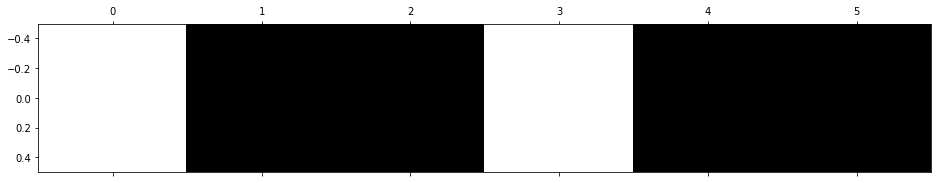

In [153]:
# Plot the mask. Black is True, White is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')

In [154]:
normalized_mergeABCD_X.columns.tolist()

[('ROP',), ('WOB',), ('RPM',), ('GR',), ('RHOB',), ('NPHI',)]

In [155]:
normalized_mergeABCD_X_FS = pd.DataFrame(normalized_mergeABCD_X_FS,columns=[['WOB','RPM','RHOB','NPHI']])

In [156]:
# Perform cross-validation and hyperparameter tune.
cv = KFold(n_splits=5, random_state=42, shuffle=True)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 1232], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(SVR(), param_grid=param_grid, cv=cv, verbose=1, return_train_score=True, n_jobs=-1)

grid.fit(normalized_mergeABCD_X_FS, y_VertABCD)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   21.1s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   28.7s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
       error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 1232], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [157]:
print(grid.best_params_)

{'C': 1232, 'gamma': 10}


In [158]:
# Take the hyperparameter tuned model with RFE to predict DT for VertE.
hypertune_SVR = grid.predict(normalized_VertE_slice_X[['RPM','GR','RHOB','NPHI']])

In [159]:
x = VertE_slice['DEPT']
y = VertE_slice['DT']
z = hypertune_SVR

p = figure(title='VertE Predicted DT using SVR', plot_width=600, plot_height=300)
r = p.line(x, y, color='green', line_width=0.5,legend='DT')
r1 = p.line(x, z, color='blue', line_width=0.5,legend='Pred. DT SVR')

p.xaxis.axis_label = 'Depth (ft)'
p.yaxis.axis_label = 'DT (ms/ft)'
p.legend.location = 'top_left'
show(p)

<div class="alert alert-success">
    <b>EXERCISE 9 SOLUTION END </b>
</div>

<div class="alert alert-success">
    <b>EXERCISE 10</b>:
     <ul>
      <li> 
       Lets pretend to be geologists unless you are a real one (separate assignment).
       <li>
       1. Cut out the section of every well between 5000 and 6000 feet.
       <li>
       2. Concatenate 4 of the wells and use them to predict RHOB for the 5th well.
       <li>
       3. Setup X and y matrices to predict RHOB.
       <li>
       4. Perform RFE.
       <li>
       5. Perform hyperparameter tuning.
       <li>
       6. Predict 5th Well.
       <li>
       7. Plot prediction vs. actual.    
<div>

<div class="alert alert-success">
    <b>EXERCISE 10 SOLUTION START </b>
</div>

In [160]:
# Setup our X and y matrices
X_VertABCD = mergeABCD[['ROP','WOB','RPM','GR','DT','NPHI']]
y_VertABCD = mergeABCD['RHOB']

X_VertE = VertE_slice[['ROP','WOB','RPM','GR','DT','NPHI']]
y_VertE = VertE_slice['RHOB']

In [161]:
# SVR works much faster when data is normalized.

scaler = Normalizer().fit(X_VertABCD[['ROP','WOB','RPM','GR','DT','NPHI']])
normalized_mergeABCD_X = scaler.transform(X_VertABCD[['ROP','WOB','RPM','GR','DT','NPHI']])

scaler = Normalizer().fit(VertE_slice[['ROP','WOB','RPM','GR','DT','NPHI']])
normalized_VertE_slice_X = scaler.transform(VertE_slice[['ROP','WOB','RPM','GR','DT','NPHI']])

# Convert back to pandas dataframes
normalized_mergeABCD_X = pd.DataFrame(normalized_mergeABCD_X,columns=[['ROP','WOB','RPM','GR','DT','NPHI']])
normalized_VertE_slice_X = pd.DataFrame(normalized_VertE_slice_X,columns=[['ROP','WOB','RPM','GR','DT','NPHI']])

In [162]:
select = RFE(svr,n_features_to_select=4)

In [163]:
select.fit(normalized_mergeABCD_X, y_VertABCD)
normalized_mergeABCD_X_FS = select.transform(normalized_mergeABCD_X)
print(normalized_mergeABCD_X.shape)
print(normalized_mergeABCD_X_FS.shape)

(3956, 6)
(3956, 4)


In [164]:
mask = select.get_support()
mask

array([ True, False, False,  True,  True,  True])

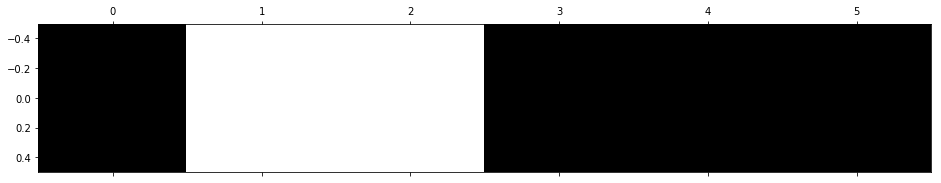

In [165]:
# Plot the mask. Black is True, White is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')

In [166]:
normalized_mergeABCD_X.columns.tolist()

[('ROP',), ('WOB',), ('RPM',), ('GR',), ('DT',), ('NPHI',)]

In [167]:
normalized_mergeABCD_X_FS = pd.DataFrame(normalized_mergeABCD_X_FS,columns=[['ROP','GR','DT','NPHI']])


In [168]:
# Perform cross-validation and hyperparameter tune.
cv = KFold(n_splits=5, random_state=42, shuffle=True)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 1232], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(SVR(), param_grid=param_grid, cv=cv, verbose=1, return_train_score=True, n_jobs=-1)

grid.fit(normalized_mergeABCD_X_FS, y_VertABCD)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   17.5s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
       error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 1232], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [169]:
print(grid.best_params_)

{'C': 1232, 'gamma': 10}


In [170]:
# Take the hyperparameter tuned model with RFE to predict DT for VertE.
hypertune_SVR = grid.predict(normalized_VertE_slice_X[['ROP','GR','DT','NPHI']])

In [171]:
x = VertE_slice['DEPT']
y = VertE_slice['RHOB']
z = hypertune_SVR

p = figure(title='VertE Predicted RHOB using SVR', plot_width=600, plot_height=300)
r = p.line(x, y, color='green', line_width=0.5,legend='RHOB')
r1 = p.line(x, z, color='blue', line_width=0.5,legend='Pred. RHOB SVR')

p.xaxis.axis_label = 'Depth (ft)'
p.yaxis.axis_label = 'Density (g/cc)'
p.legend.location = 'bottom_right'
show(p)

<div class="alert alert-success">
    <b>EXERCISE 10 SOLUTION END </b>
</div>

<div class="alert alert-success">
    <b>EXERCISE 11</b>:
     <ul>
      <li> 
       Lets pretend to be geologists unless you are a real one (separate assignment).
       <li>
       1. Cut out the section of every well between 5000 and 6000 feet.
       <li>
       2. Concatenate 4 of the wells and use them to predict NPHI for the 5th well.
       <li>
       3. Setup X and y matrices to predict NPHI.
       <li>
       4. Perform RFE.
       <li>
       5. Perform hyperparameter tuning.
       <li>
       6. Predict 5th Well.
       <li>
       7. Plot prediction vs. actual.
           
<div>

<div class="alert alert-success">
    <b>EXERCISE 11 SOLUTION START </b>
</div>

In [172]:
# Setup our X and y matrices
X_VertABCD = mergeABCD[['ROP','WOB','RPM','GR','RHOB','DT']]
y_VertABCD = mergeABCD['NPHI']

X_VertE = VertE_slice[['ROP','WOB','RPM','GR','RHOB','DT']]
y_VertE = VertE_slice['NPHI']

In [173]:
# SVR works much faster when data is normalized.

scaler = Normalizer().fit(X_VertABCD[['ROP','WOB','RPM','GR','RHOB','DT']])
normalized_mergeABCD_X = scaler.transform(X_VertABCD[['ROP','WOB','RPM','GR','RHOB','DT']])

scaler = Normalizer().fit(VertE_slice[['ROP','WOB','RPM','GR','RHOB','DT']])
normalized_VertE_slice_X = scaler.transform(VertE_slice[['ROP','WOB','RPM','GR','RHOB','DT']])

# Convert back to pandas dataframes
normalized_mergeABCD_X = pd.DataFrame(normalized_mergeABCD_X,columns=[['ROP','WOB','RPM','GR','RHOB','DT']])
normalized_VertE_slice_X = pd.DataFrame(normalized_VertE_slice_X,columns=[['ROP','WOB','RPM','GR','RHOB','DT']])

In [174]:
select = RFE(svr,n_features_to_select=4)

In [175]:
select.fit(normalized_mergeABCD_X, y_VertABCD)
normalized_mergeABCD_X_FS = select.transform(normalized_mergeABCD_X)
print(normalized_mergeABCD_X.shape)
print(normalized_mergeABCD_X_FS.shape)

(3956, 6)
(3956, 4)


In [176]:
mask = select.get_support()
mask

array([ True, False,  True, False,  True,  True])

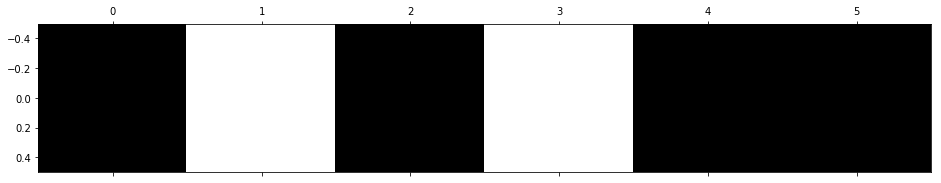

In [177]:
# Plot the mask. Black is True, White is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')

In [178]:
normalized_mergeABCD_X.columns.tolist()

[('ROP',), ('WOB',), ('RPM',), ('GR',), ('RHOB',), ('DT',)]

In [179]:
normalized_mergeABCD_X_FS = pd.DataFrame(normalized_mergeABCD_X_FS,columns=[['ROP','RPM','RHOB','DT']])


In [180]:
# Perform cross-validation and hyperparameter tune.
cv = KFold(n_splits=5, random_state=42, shuffle=True)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 1232], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(SVR(), param_grid=param_grid, cv=cv, verbose=1, return_train_score=True, n_jobs=-1)

grid.fit(normalized_mergeABCD_X_FS, y_VertABCD)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    3.2s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
       error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 1232], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [181]:
print(grid.best_params_)

{'C': 1232, 'gamma': 1}


In [182]:
# Take the hyperparameter tuned model with RFE to predict NPHI for VertE.
hypertune_SVR = grid.predict(normalized_VertE_slice_X[['ROP','RPM','RHOB','DT']])

In [183]:
x = VertE_slice['DEPT']
y = VertE_slice['NPHI']
z = hypertune_SVR

p = figure(title='VertE Predicted NPHI using SVR', plot_width=600, plot_height=300)
r = p.line(x, y, color='green', line_width=0.5,legend='NPHI')
r1 = p.line(x, z, color='blue', line_width=0.5,legend='Pred. NPHI SVR')

p.xaxis.axis_label = 'Depth (ft)'
p.yaxis.axis_label = 'NPHI (%)'
p.legend.location = 'top_right'
show(p)

<div class="alert alert-success">
    <b>EXERCISE 11 SOLUTION END </b>
</div>